In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import pearsonr

# dane

dane = pd.read_csv('Dane_praca_zad2.csv', sep=';')
print(dane['Liczba osob ktore znalazly prace'])

print(dane.head())

#Zbudować model logitowy dla prawdopodobieństwa znalezienia
# pracy w zależności od wieku rejestrującego się oraz jego stażu pracy

# zmienne obcjasniajace Staż i wiek bezrobotnych
# zmienna objasniana prawdopodobienstwo czyli Liczba bezrobotnych ktorzy znalezli prace/Liczba badanych

dane['prawdopodobienstwo'] = dane['Liczba osob ktore znalazly prace']/dane['Liczba badanych bezrobotnych']
#

print(dane.head())
X = dane[["Sredni staz pracy (lata)", "Wiek bezrobotnych(lata)"]]
# dodaj "Wiek bezrobotnych(lata)" do X

dane['logity']=dane['prawdopodobienstwo']/(1-dane['prawdopodobienstwo'])
dane['logity']=np.log(dane['logity'])
print(dane['logity'])
dane['logity_2']=1/(1+np.exp(-dane['logity']))

# podziel dane na uczące i testowe
X_treningowe, X_testowe, y_treningowe, y_testowe = train_test_split(X, dane['prawdopodobienstwo'], test_size=0.2, random_state=42)

y_treningowe_prawdo=y_treningowe
y_treningowe=y_treningowe/(1-y_treningowe)
y_treningowe=np.log(y_treningowe)

y_treningowe_exp=1/(1+np.exp(-y_treningowe))
y_testowe_exp=1/(1+np.exp(-y_testowe))

print(y_treningowe)

print(y_treningowe_prawdo)

#korelacje
corr, _ = pearsonr(dane['Liczba osob ktore znalazly prace'], dane['Liczba badanych bezrobotnych'])
print("Korelacja zmiennych objasniających):\n", corr)

# wypisz wszystkie korelacje po koleji
for i in dane.columns:
    corr, _ = pearsonr(dane[i], dane['logity'])
    # nazwa kolumny i corr
    print(i, corr)



0    100
1    160
2    110
3    130
4    180
5    200
6    110
7     60
8     33
9     13
Name: Liczba osob ktore znalazly prace, dtype: int64
   Numer grupy  Liczba badanych bezrobotnych  Wiek bezrobotnych(lata)  \
0            1                          1000                     22.0   
1            2                          1500                     26.5   
2            3                           900                     30.0   
3            4                           800                     34.5   
4            5                          1000                     38.0   

   Sredni staz pracy (lata)  Liczba osob ktore znalazly prace  
0                         1                               100  
1                         3                               160  
2                         5                               110  
3                         7                               130  
4                         9                               180  
   Numer grupy  Liczba badanych be

In [5]:

# wykres dwoch zmiennych objasniajacych liniowy
# X_treningowe_2_lin = sm.add_constant(X_treningowe)
# wynik_lin = sm.OLS(y_treningowe, X_treningowe_2_lin).fit()
# print(wynik_lin.summary())
#
#
#
# # Tworzenie siatki wartości (staż pracy i wiek)
# staz_pracy = np.linspace(dane['Sredni staz pracy (lata)'].min(), dane['Sredni staz pracy (lata)'].max(), 50)
# wiek = np.linspace(dane['Wiek bezrobotnych(lata)'].min(), dane['Wiek bezrobotnych(lata)'].max(), 50)
# staz_pracy, wiek = np.meshgrid(staz_pracy, wiek)
#
# # Wyciągnięcie współczynników z regresji liniowej
# b0, b1, b2 = wynik_lin.params[0], wynik_lin.params[1], wynik_lin.params[2]

# # Obliczenie wartości funkcji liniowej
# z = b0 + b1 * staz_pracy + b2 * wiek  # Płaszczyzna funkcji liniowej
#
# # 2. Wykres 3D z plotly – funkcja liniowa (płaszczyzna regresji)
# fig = go.Figure(data=[go.Surface(z=z, x=staz_pracy, y=wiek)])
#
# # Ustawienia wykresu
# fig.update_layout(
#     title="Płaszczyzna regresji liniowej w 3D",
#     scene=dict(
#         xaxis_title="Średni staż pracy (lata)",
#         yaxis_title="Wiek bezrobotnych (lata)",
#         zaxis_title="Prawodobodobieństwo znaleznienia pracy",
#         zaxis=dict(range=[z.min(), z.max()])  # Skalowanie Z bazowe na wartościach regresji
#     )
# )
# fig.show()


In [6]:
# Wykres prawdopodobiesnwa od dwoch zmiennych objasniajacych

zdarzenie_przeciwne=dane['prawdopodobienstwo']/(1-dane['prawdopodobienstwo'])
# logarytm naturalny z zdarzenie_przeciwne
log= np.log(zdarzenie_przeciwne)
print(log)

# najmniesze kwadraty b0
b0=wynik.params[0]
print(b0)

# Tworzenie macierzy X dla dwóch zmiennych objaśniających
X = np.vstack([
    np.ones_like(dane["Sredni staz pracy (lata)"]),  # Kolumna jedynek (dla wyrazu wolnego)
    dane["Sredni staz pracy (lata)"],  # Pierwsza zmienna objaśniająca
    dane["Wiek bezrobotnych(lata)"]  # Druga zmienna objaśniająca
]).T

# Wzór: b = (X^T * X)^(-1) * X^T * log
b = np.linalg.inv(X.T @ X) @ X.T @ log

# Wyniki współczynników
b0, b1, b2 = b[0], b[1], b[2]
# fukcja exp
print(f"Współczynniki:")
print(f"b0 (wyraz wolny) = {b0}")
print(f"b1 (współczynnik zmiennej 1) = {b1}")
print(f"b2 (współczynnik zmiennej 2) = {b2}")
# X = dane[["Sredni staz pracy (lata)", "Wiek bezrobotnych(lata)"]]

# wykres  funckji
# os X srednia staz pracy i wiek bezrobotnego
# os Y prawdopodobiestwo
# Tworzymy siatkę wartości zmiennych niezależnych (staż pracy i wiek)
staz_pracy = np.linspace(dane['Sredni staz pracy (lata)'].min(), dane['Sredni staz pracy (lata)'].max(), 50)
wiek = np.linspace(dane['Wiek bezrobotnych(lata)'].min(), dane['Wiek bezrobotnych(lata)'].max(), 50)
staz_pracy, wiek = np.meshgrid(staz_pracy, wiek)

# Obliczenie prawdopodobieństwa z funkcji logistycznej
# logit = b0 + b1 * staz_pracy + b2 * wiek
# prawdopodobieństwo = 1 / (1 + exp(-logit))
log = b0 + b1 * staz_pracy + b2 * wiek
prawdopodobienstwo = 1 / (1 + np.exp(-log))

# Tworzenie wykresu 3D
fig = go.Figure(data=[go.Surface(z=prawdopodobienstwo, x=staz_pracy, y=wiek)])

# Ustawienia etykiet
fig.update_layout(
    title="Interaktywny wykres regresji logistycznej",
    scene=dict(
        xaxis_title="Średni staż pracy (lata)",
        yaxis_title="Wiek bezrobotnych (lata)",
        zaxis_title="Prawdopodobieństwo"
    )
)

# Wyświetlenie wykresu
fig.show()

# correlations






0   -2.197225
1   -2.125251
2   -1.971553
3   -1.639743
4   -1.516347
5   -1.098612
6   -0.969401
7   -0.847298
8   -0.708185
9   -3.393475
Name: prawdopodobienstwo, dtype: float64


NameError: name 'wynik' is not defined

                            OLS Regression Results                            
Dep. Variable:                 logity   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.096
Method:                 Least Squares   F-statistic:                    0.2119
Date:                Sat, 21 Dec 2024   Prob (F-statistic):              0.658
Time:                        16:02:57   Log-Likelihood:                -11.492
No. Observations:                  10   AIC:                             26.98
Df Residuals:                       8   BIC:                             27.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\macie\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=10



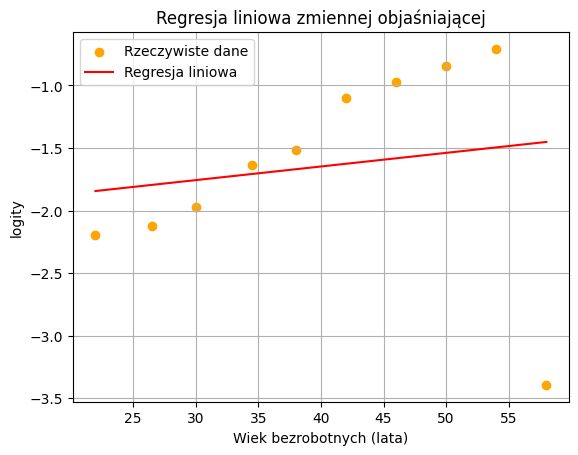

In [52]:
# model liniowy z jedną zmienna objasiajaca
# widzimy że mniej skorelowany z prawdopodobienstwem jest Wiek oraz silną korelację zmiennych objasniajacych
# dlatego tworzymy nowy model z jedną zmienna wiek
X_model_3=sm.add_constant(dane["Wiek bezrobotnych(lata)"])

wynik_3 = sm.OLS(dane['logity'], X_model_3).fit()
print(wynik_3.summary())
plt.scatter(dane['Wiek bezrobotnych(lata)'], dane['logity'], label="Rzeczywiste dane", color='orange')
plt.plot(dane[["Wiek bezrobotnych(lata)"]], wynik_3.predict(X_model_3), label="Regresja liniowa", color="red")
plt.title("Regresja liniowa zmiennej objasniajaca")
plt.xlabel("Wiek bezrobotnych (lata)")
plt.ylabel("logity")
plt.legend()
plt.grid(True)
plt.show()




Optimization terminated successfully.
         Current function value: 0.322933
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:     prawdopodobienstwo   No. Observations:                    8
Model:                          Logit   Df Residuals:                        6
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                     inf
Time:                        16:09:09   Log-Likelihood:                -2.5835
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.9435      3.647     -0.533      0.594      -9.091   

C:\Users\macie\miniconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:4469: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\macie\AppData\Local\Temp\ipykernel_25044\171774962.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



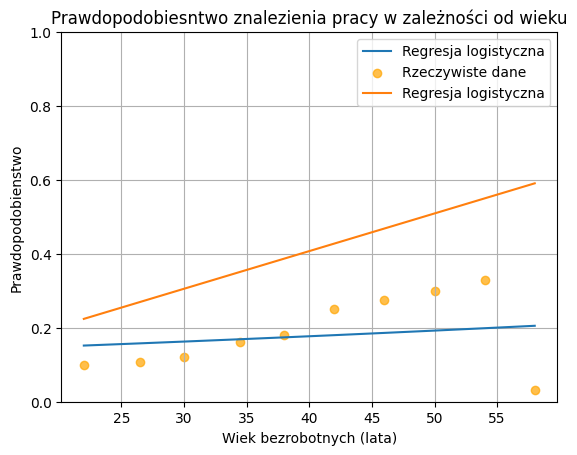

In [65]:
# MODEL LOGITOWY JEDNA ZMIENNA

# Tworzenie modelu z jedną zmienną niezależną (wiek) z dodatkiem stałej
X_model_2 = sm.add_constant(X_treningowe.loc[:, ["Wiek bezrobotnych(lata)"]])  # Poprawne użycie loc
wynik_2 = sm.Logit(y_treningowe_exp, X_model_2).fit()
print(wynik_2.summary())

# Przewidywanie na zbiorze testowym
X_testowe_wiek = sm.add_constant(X_testowe.loc[:, ["Wiek bezrobotnych(lata)"]])  # Poprawne użycie loc
y_predykcje_2 = wynik_2.predict(X_testowe_wiek)
print(y_predykcje_2)

# Wyliczenie wartości funkcji sigmoid
b0, b1 = wynik_2.params[0], wynik_2.params[1]
wynik_funkcji = 1 / (1 + np.exp(-b0 - b1 * dane.loc[:, 'Wiek bezrobotnych(lata)']))

# Współczynniki modelu
coef = wynik_2.params
print(coef)

# Rysowanie wykresów
plt.plot(dane.loc[:, 'Wiek bezrobotnych(lata)'], wynik_funkcji, label="Regresja logistyczna")
plt.scatter(dane.loc[:, 'Wiek bezrobotnych(lata)'], dane.loc[:, 'logity_2'], label="Rzeczywiste dane", color='orange',
            alpha=0.7)

# Regresja liniowa
# plt.plot(dane.loc[:, 'Wiek bezrobotnych(lata)'], dane.loc[:, 'Wiek bezrobotnych(lata)']*b1, label="Regresja logistyczna")


# Oznaczenia wykresu
plt.title("Prawdopodobiesntwo znalezienia pracy w zależności od wieku")
plt.xlabel("Wiek bezrobotnych (lata)")
plt.ylabel("Prawdopodobienstwo")
plt.ylim(0, 1)  # Ustawienie zakresu osi Y
plt.legend()
plt.grid(True)
plt.show()
